# Analyse Exploratoire

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy as scp

data = pd.read_csv('data_clean.csv', encoding='utf-8', sep='\t')


data.columns

C:\Users\vkubi\AppData\Local\Temp\ipykernel_19280\3799664371.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_clean.csv', encoding='utf-8', sep='\t')


Index(['index', 'code', 'url', 'product_name', 'nutrition_grade_fr',
       'nutrition-score-fr_100g', 'pnns_groups_1', 'countries', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'sugars_100g', 'carbohydrates_100g', 'proteins_100g', 'sodium_100g',
       'salt_100g'],
      dtype='object')

## Analyse univariée
### Variables quantitative
### Analyse de l'energie

In [288]:
data.describe()
data = data.drop('index', axis=1)

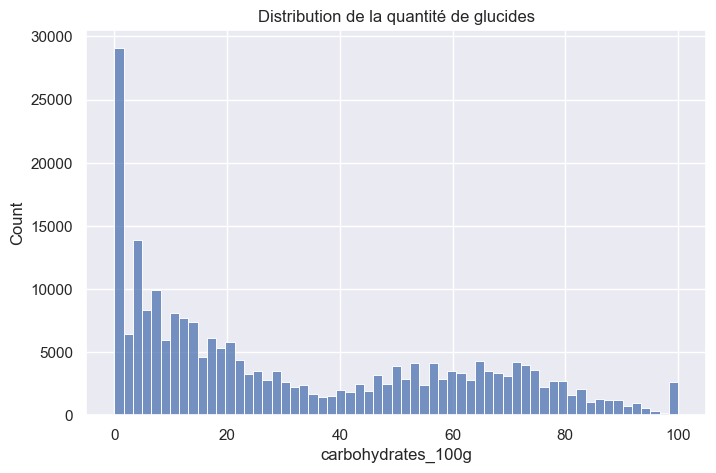

In [289]:
# plt.hist(data['energy_100g'], bins=np.arange(data['energy_100g'].min(), data['energy_100g'].max()+1))
sbn.histplot(data=data, x='carbohydrates_100g' )
plt.title("Distribution de la quantité de glucides")
plt.show()

## Variables qualitatives

### Repartition du nutrition grade sur tous les individus

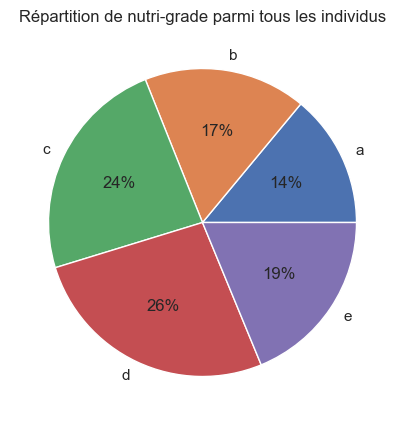

In [290]:
plt.pie(x=data.groupby(by='nutrition_grade_fr')['nutrition_grade_fr'].count(), labels=['a', 'b', 'c', 'd', 'e'], autopct='%1.0f%%')
plt.title("Répartition de nutri-grade parmi tous les individus")
plt.show()

### Répartition du nutrition-grade sur les produits de type 'sugary snacks'

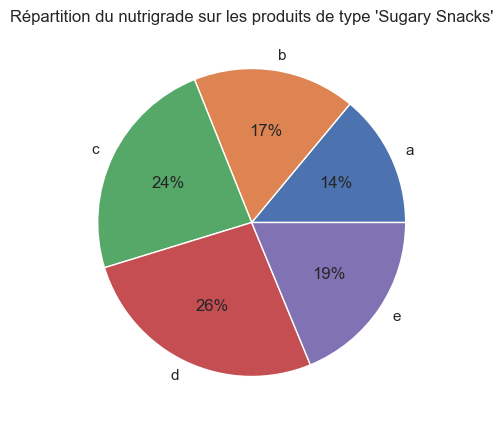

In [291]:
plt.pie(x=data.groupby(by='nutrition_grade_fr')['nutrition_grade_fr'].count(), labels=['a', 'b', 'c', 'd', 'e'], autopct='%1.0f%%')
plt.title("Répartition du nutrigrade sur les produits de type 'Sugary Snacks'")
plt.show()

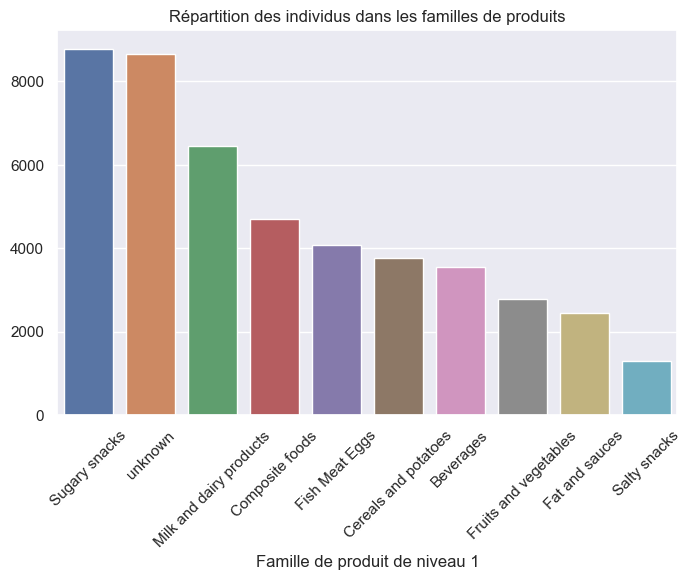

In [292]:
tab = sbn.countplot(data=data, x="pnns_groups_1", order = data['pnns_groups_1'].value_counts().index)
plt.xticks(rotation=45)
plt.ylabel('')
plt.xlabel('Famille de produit de niveau 1')
plt.title("Répartition des individus dans les familles de produits")
plt.show()

## Analyse Bivariée

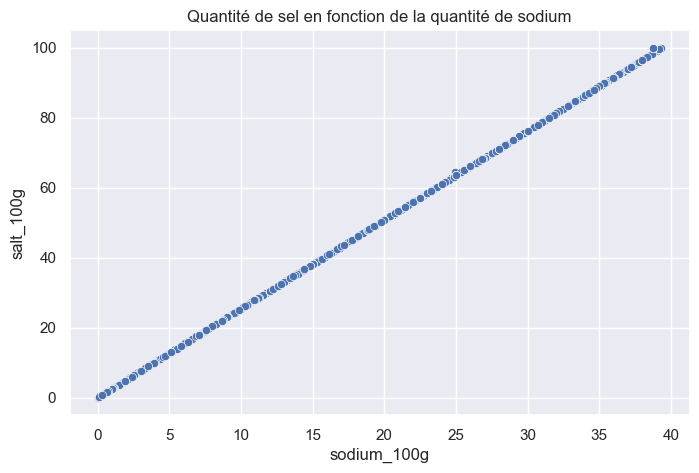

In [293]:
subset = data.sample(1000)
sbn.set(rc={'figure.figsize':(8,5)})
sbn.scatterplot(data=data, y='salt_100g', x='sodium_100g')
plt.title('Quantité de sel en fonction de la quantité de sodium')
plt.show()

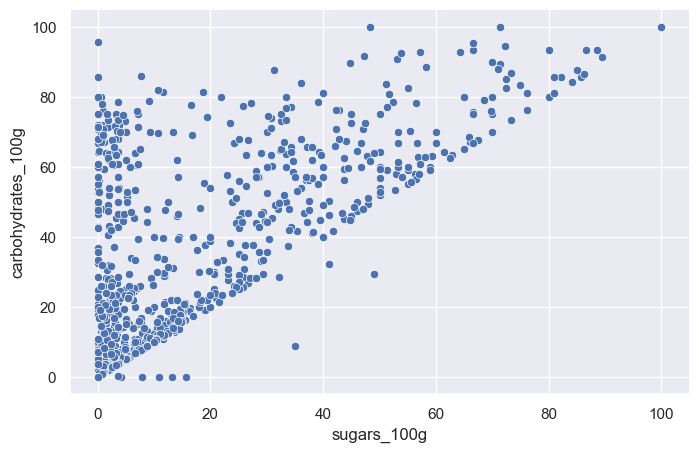

In [294]:
sbn.scatterplot(data=subset, y='carbohydrates_100g', x='sugars_100g')
plt.show()

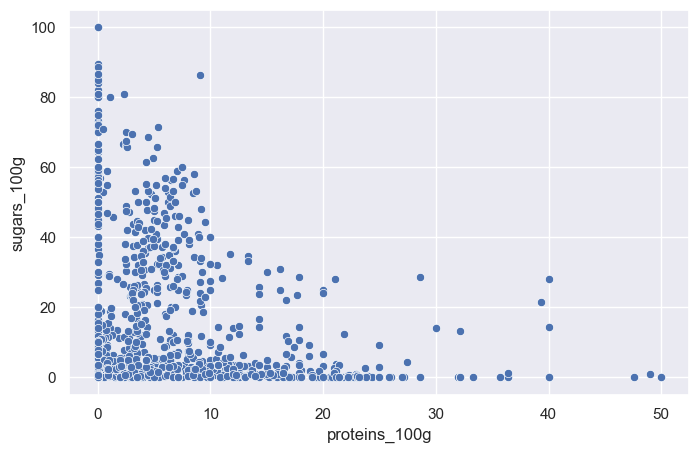

In [295]:
sbn.scatterplot(data=subset, x='proteins_100g', y='sugars_100g')
plt.show()

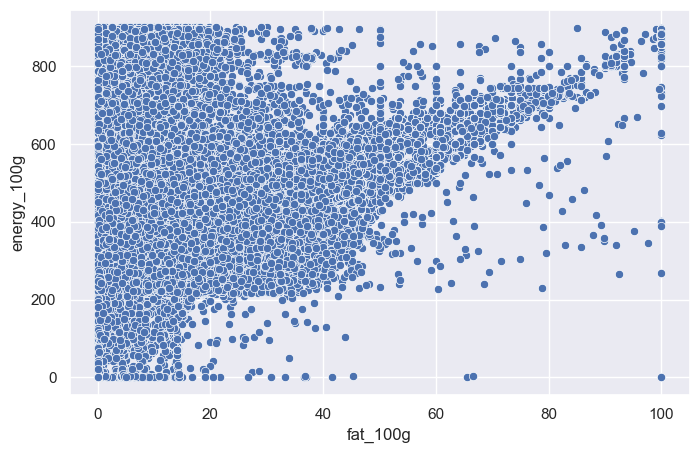

In [296]:
sbn.scatterplot(data=data, y='energy_100g', x='fat_100g')
plt.show()

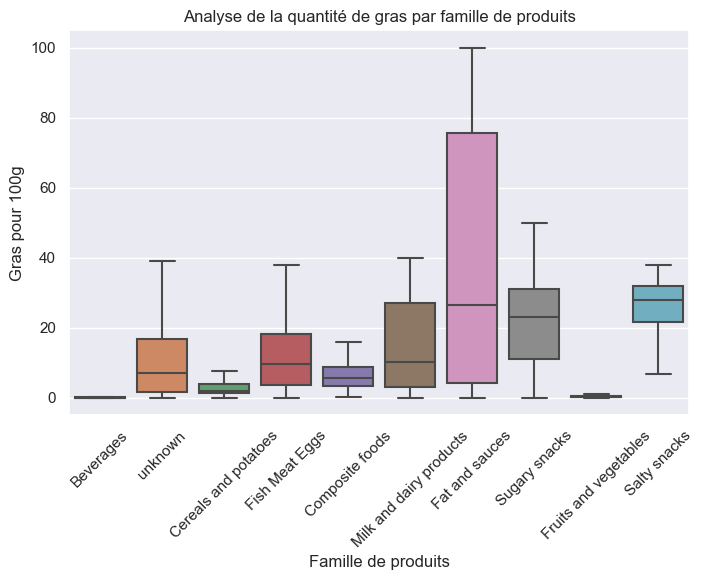

In [297]:
subset = data.sample(10_000, random_state=567)
sbn.boxplot(data=subset, x='pnns_groups_1', y='fat_100g', showfliers=False)
plt.xticks(rotation=45)
plt.xlabel("Famille de produits")
plt.ylabel("Gras pour 100g")
plt.title("Analyse de la quantité de gras par famille de produits")
plt.show()

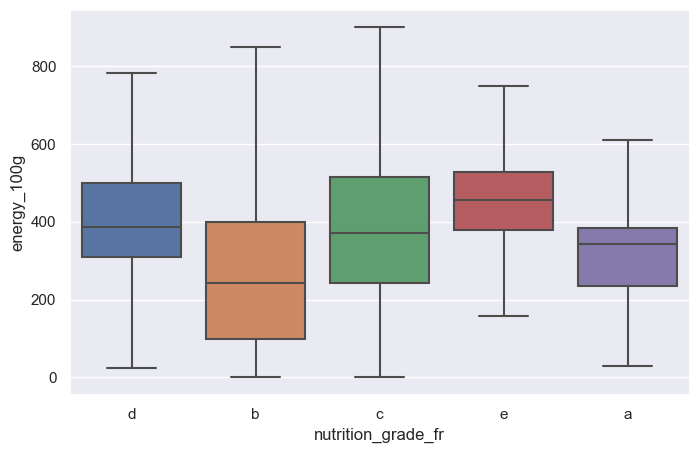

In [298]:
sbn.boxplot(data=subset, x='nutrition_grade_fr', y='energy_100g', showfliers=False)
plt.show()

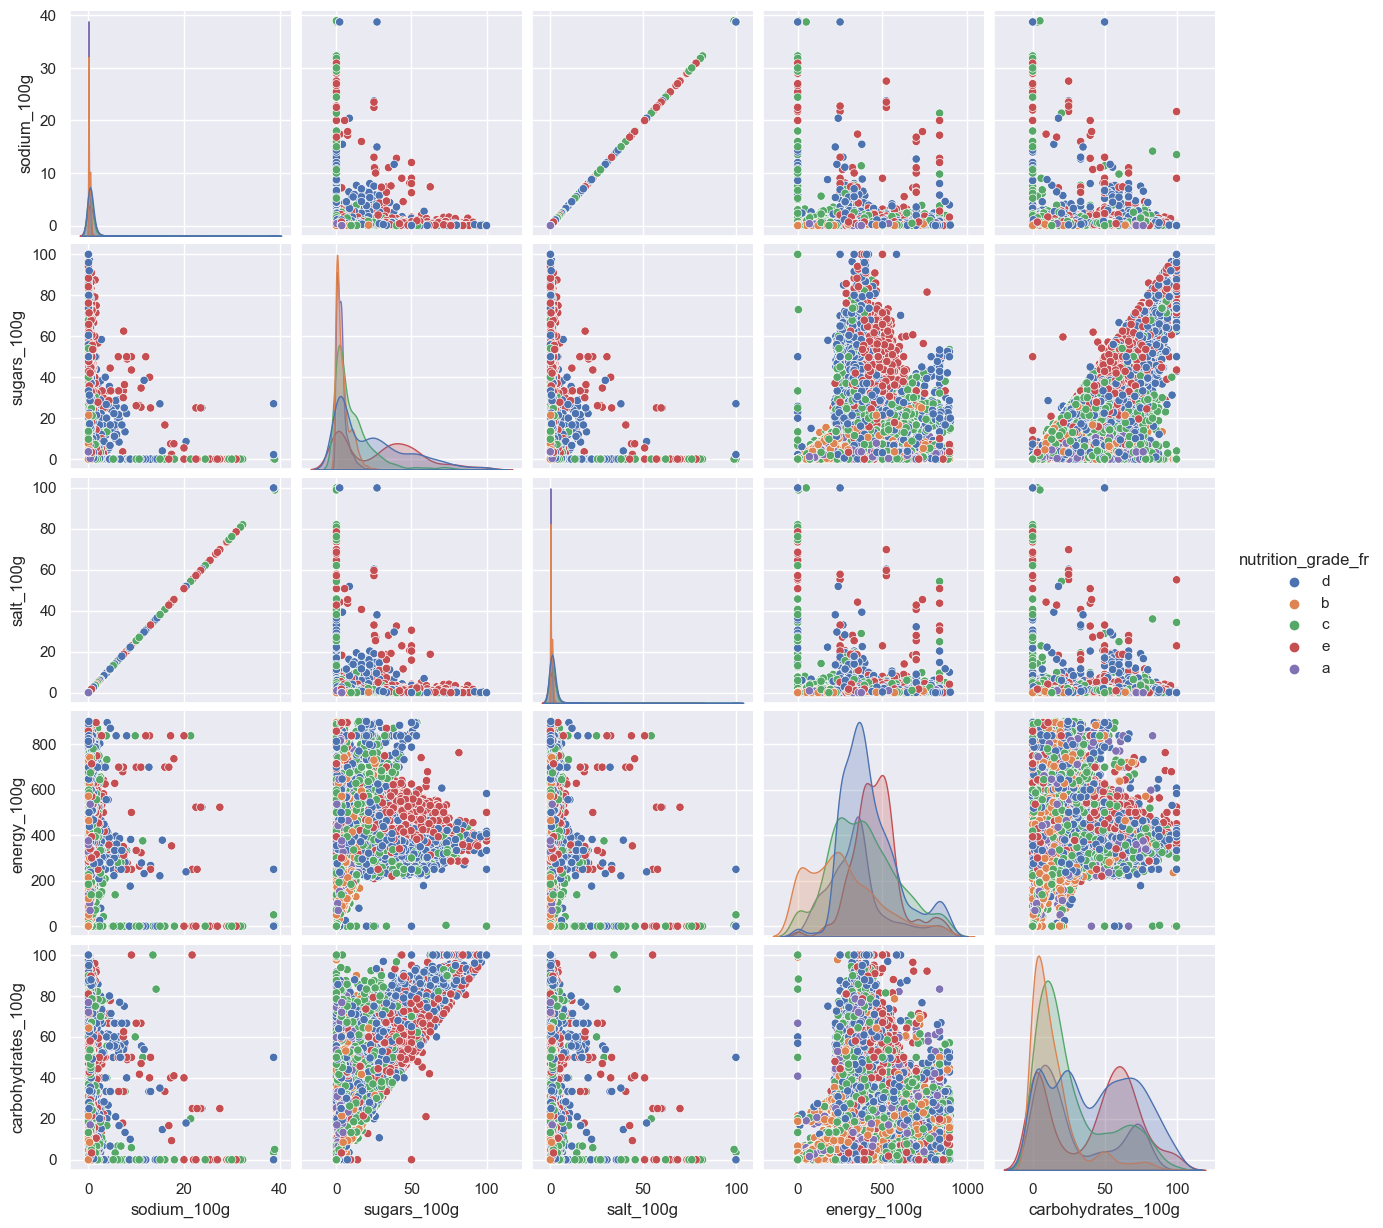

In [299]:
columns = ['sodium_100g', 'sugars_100g', 'salt_100g', 'energy_100g', 'carbohydrates_100g']
sbn.pairplot(data=subset, vars= columns, hue='nutrition_grade_fr')
plt.show()

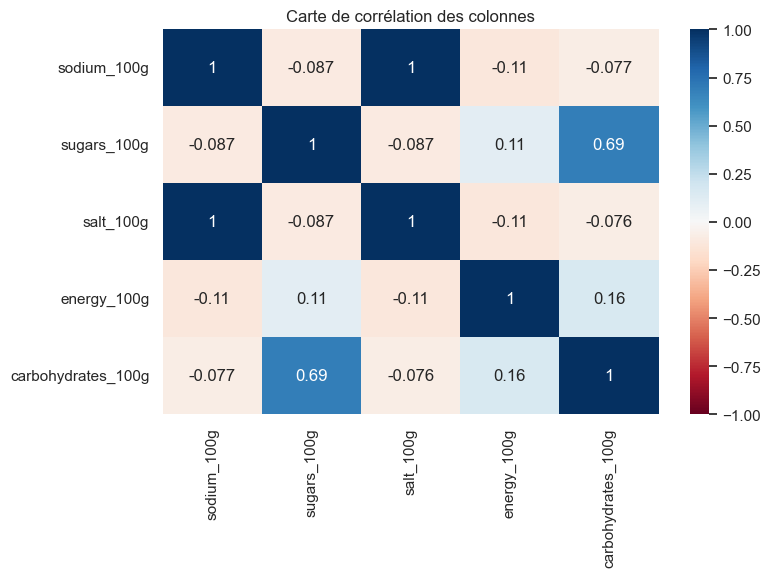

In [300]:
sbn.heatmap(data[columns].corr(), vmin=-1, vmax=1, cmap='RdBu',annot=True)
plt.title("Carte de corrélation des colonnes")
plt.show()

## ANOVA
### Le nutrigrade et le sucre

In [301]:
sucre = data['sugars_100g'],
nutrigrade = data['nutrition_grade_fr']
nutriscore = data['nutrition-score-fr_100g']

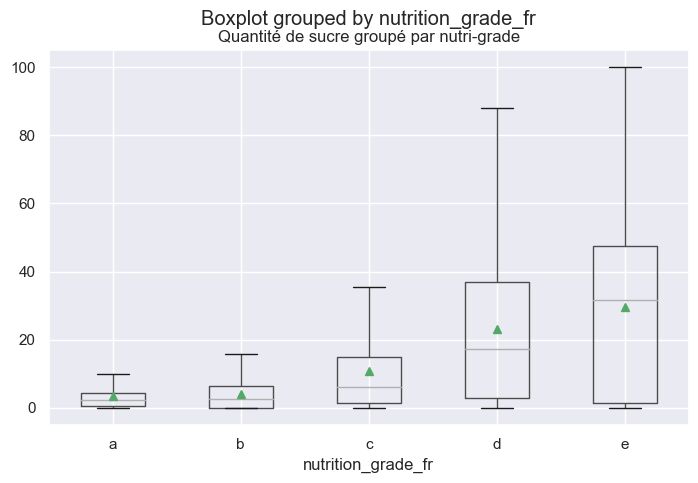

In [302]:
data.boxplot(column=['sugars_100g'], by='nutrition_grade_fr', showfliers=False, showmeans=True)
plt.title("Quantité de sucre groupé par nutri-grade")
plt.show()

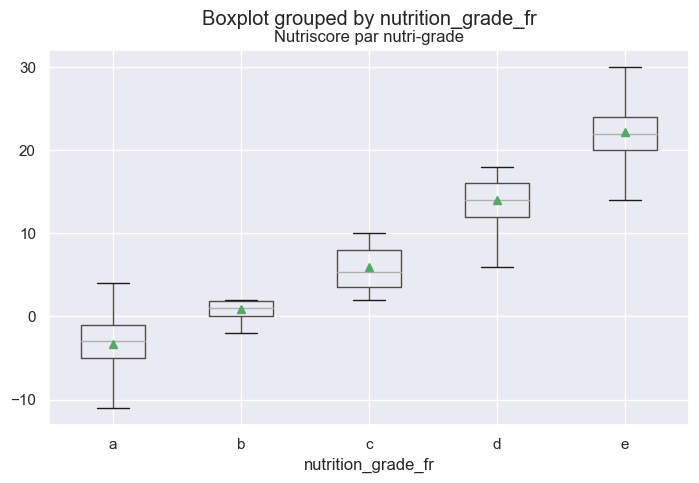

In [303]:
data.boxplot(column=['nutrition-score-fr_100g'], by='nutrition_grade_fr', showfliers=False, showmeans=True)
plt.title("Nutriscore par nutri-grade")
plt.show()

In [304]:
def sct(quanti):
    """
    Calcule la variation totale
    :param quanti: Serie du dataframe contenant la variable quantitative
    :return: Total Sum of Squares
    """
    x = quanti
    return ((x - x.mean())**2).sum()

def sce(quanti, quali):
    """
    Calcule la variation interclasse
    :param quanti: Serie du dataframe contenant la variable quantitative
    :param quali: Serie du dataframe contenant la variable qualitative (classes)
    :return: Sum of Squares of the Model
    """
    moyenne = quanti[0].mean()
    specs_classes = {}
    for classe in quali.unique():
        specs_classes[classe] = {'effect_classe': sum(quali == classe), 'moyenne_classe': np.mean(quali == classe)}

    sum_sq_err = 0
    for classe in quali.unique():
        sum_sq_err += specs_classes[classe]['effect_classe'] * (specs_classes[classe]['moyenne_classe'] - moyenne)**2
    return sum_sq_err


X = "nutrition_grade_fr" # qualitative
Y = "nutrition-score-fr_100g" # quantitative

def eta_squared(x, y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

print("Rapport de corrélation entre le nutrigrade et nutricscore : ", round(eta_squared(data['nutrition_grade_fr'],data['nutrition-score-fr_100g']), 2))
print("Rapport de corrélation entre le sucre et nutrigrade : ", round(eta_squared(data['nutrition_grade_fr'],data['sugars_100g']),2))

Rapport de corrélation entre le nutrigrade et nutricscore :  nan
Rapport de corrélation entre le sucre et nutrigrade :  nan


**La variation intraclasse est d'environ 0.7 ce qui nous indique qu'il y a surement correlation entre la quantité de sucre et le nutriscore du produit**
Ce qui est normalement le cas vu que le sucre est un composant du calcul du nutriscore.

# ACP (Analyse de composantes principales)

In [305]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# On retire les colonnes non numériques
data_pca = data.drop(['url', 'countries', 'product_name', 'nutrition_grade_fr', 'pnns_groups_1'], axis=1)

In [306]:
data_pca.shape

(238389, 12)

In [307]:
data_pca[data_pca.isna().any(axis=1)]

Empty DataFrame
Columns: [code, nutrition-score-fr_100g, energy_100g, fat_100g, saturated-fat_100g, trans-fat_100g, cholesterol_100g, sugars_100g, carbohydrates_100g, proteins_100g, sodium_100g, salt_100g]
Index: []

In [308]:
scaler = StandardScaler(with_std=True)
# on fit
X = data_pca.values
scaler.fit(X)
# on transforme
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-2.04814321e-03,  4.33435472e-01, -1.55466400e-01,
        -6.18494948e-01, -5.87719438e-01, -3.81004427e-02,
        -7.63146895e-02,  2.15346738e+00,  1.59987370e+00,
        -3.47741351e-01, -2.35287027e-01, -2.34950257e-01],
       [-2.04814321e-03, -7.14990425e-03,  3.63177831e-01,
         1.79837426e-01, -4.73704892e-01, -7.45902836e-02,
        -6.78346193e-02, -6.50173729e-01,  1.25039184e+00,
         1.89659957e-01,  2.42977750e-02,  2.41128908e-02],
       [-2.04814321e-03,  4.33435472e-01,  3.93353806e-02,
        -5.52960200e-01, -5.30712165e-01, -3.81004427e-02,
        -7.63146895e-02,  1.92627578e+00,  1.70471825e+00,
         7.71806134e-02, -1.88572316e-01, -1.88329423e-01],
       [-2.04814321e-03,  1.09431354e+00,  5.39367976e-01,
         7.45819333e-01,  1.33627604e+00, -3.81004427e-02,
         3.19718126e-02,  8.48324107e-01,  8.31013621e-01,
         2.19438436e-03, -1.88572316e-01, -1.88329423e-01],
       [-2.04814321e-03,  1.53489891e+00,  8.8678516

In [309]:
n_components = 9
# instancie
pca = PCA(n_components=n_components)
# On entraine
pca.fit(X_scaled)

scree = (pca.explained_variance_ratio_*100).round(2)
print("pourcentage de captation de la variance :", scree)

scree_cum = scree.cumsum().round()
print("Somme cumulée des % de variance captées :", scree_cum)


x_list = range(1, n_components+1)
list(x_list)

pourcentage de captation de la variance : [22.77 17.49 15.52  8.34  8.33  8.31  7.54  5.72  2.6 ]
Somme cumulée des % de variance captées : [23. 40. 56. 64. 72. 81. 88. 94. 97.]


[1, 2, 3, 4, 5, 6, 7, 8, 9]

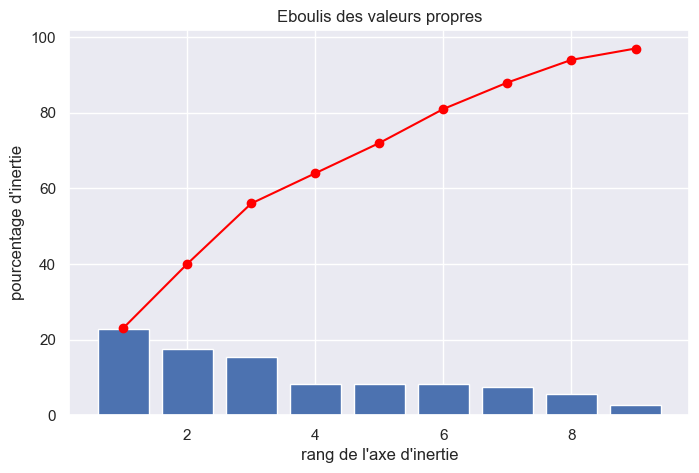

In [310]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

## On a donc un repartition d'inertie homogène, donc pas vraiment de composantes captant une grande partie de la variance

In [311]:
def correlation_graph(pca, x_y, features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [312]:
def display_factorial_planes(X_projected, x_y, pca=None, labels=None, clusters=None, alpha=1, figsize=[10,8], marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sbn.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

## Cercle de corrélation

In [313]:
pcs = pca.components_
pcs

array([[ 8.48352995e-04,  5.13502870e-01,  3.65760416e-01,
         4.80381663e-01,  4.94329432e-01,  2.98318619e-02,
         2.72390245e-02,  2.47597792e-01,  1.91392114e-01,
         1.63647498e-01, -2.29647518e-02, -2.30190259e-02],
       [-9.61338954e-05,  1.70798879e-01, -9.03925763e-02,
         3.78214985e-02,  3.68793819e-02,  6.47805871e-03,
         2.44433710e-02, -1.48791779e-01, -1.61603368e-01,
         4.19951351e-02,  6.74265698e-01,  6.74221368e-01],
       [ 6.69682095e-04, -1.70032072e-01,  1.26167408e-01,
         2.96297630e-01,  1.69142387e-01, -1.81975734e-02,
         7.19037083e-02, -5.93218353e-01, -5.55799716e-01,
         3.73829190e-01, -1.27850135e-01, -1.27876679e-01],
       [ 1.38058091e-01, -6.54975855e-03, -1.22286437e-02,
         4.66839573e-02,  2.49711069e-03,  9.22154970e-01,
        -3.41689106e-01, -4.74068969e-02, -4.95977191e-02,
        -8.12252386e-02, -8.23828577e-03, -8.24055949e-03],
       [ 9.90376928e-01,  9.68463897e-04,  8.6556451

In [314]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0  0.000848  0.513503  0.365760  0.480382  0.494329  0.029832  0.027239   
1 -0.000096  0.170799 -0.090393  0.037821  0.036879  0.006478  0.024443   
2  0.000670 -0.170032  0.126167  0.296298  0.169142 -0.018198  0.071904   
3  0.138058 -0.006550 -0.012229  0.046684  0.002497  0.922155 -0.341689   
4  0.990377  0.000968  0.000866 -0.005247  0.000336 -0.131907  0.040174   
5  0.007439  0.037781 -0.133947 -0.038140  0.040130  0.334692  0.924497   
6  0.005847 -0.163710  0.433576 -0.196976 -0.334248  0.134013  0.103052   
7 -0.001638 -0.177620  0.737727  0.128755 -0.216059 -0.020884  0.092776   
8 -0.000330 -0.199951 -0.258248  0.500993 -0.071377 -0.016498  0.031640   

         7         8         9         10        11  
0  0.247598  0.191392  0.163647 -0.022965 -0.023019  
1 -0.148792 -0.161603  0.041995  0.674266  0.674221  
2 -0.593218 -0.555800  0.373829 -0.127850 -0.127877  
3 -0.047407 -0.049598 -0.081225 -0.008238 -0.008241  
4  0.006103  0.005279  0.006554  0.001151  0.001152  
5  0.041596 -0.027784 -0.081773 -0.028338 -0.028363  
6  0.009746  0.358854  0.680299  0.084836  0.084861  
7 -0.103227 -0.069290 -0.571342  0.070692  0.070836  
8 -0.452370  0.645409 -0.115646  0.026346  0.026562

In [315]:
pcs.columns = data_pca.columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

code  nutrition-score-fr_100g  energy_100g  fat_100g  saturated-fat_100g  \
F1  0.00                     0.51         0.37      0.48                0.49   
F2 -0.00                     0.17        -0.09      0.04                0.04   
F3  0.00                    -0.17         0.13      0.30                0.17   
F4  0.14                    -0.01        -0.01      0.05                0.00   
F5  0.99                     0.00         0.00     -0.01                0.00   
F6  0.01                     0.04        -0.13     -0.04                0.04   
F7  0.01                    -0.16         0.43     -0.20               -0.33   
F8 -0.00                    -0.18         0.74      0.13               -0.22   
F9 -0.00                    -0.20        -0.26      0.50               -0.07   

    trans-fat_100g  cholesterol_100g  sugars_100g  carbohydrates_100g  \
F1            0.03              0.03         0.25                0.19   
F2            0.01              0.02        -0.15               -0.16   
F3           -0.02              0.07        -0.59               -0.56   
F4            0.92             -0.34        -0.05               -0.05   
F5           -0.13              0.04         0.01                0.01   
F6            0.33              0.92         0.04               -0.03   
F7            0.13              0.10         0.01                0.36   
F8           -0.02              0.09        -0.10               -0.07   
F9           -0.02              0.03        -0.45                0.65   

    proteins_100g  sodium_100g  salt_100g  
F1           0.16        -0.02      -0.02  
F2           0.04         0.67       0.67  
F3           0.37        -0.13      -0.13  
F4          -0.08        -0.01      -0.01  
F5           0.01         0.00       0.00  
F6          -0.08        -0.03      -0.03  
F7           0.68         0.08       0.08  
F8          -0.57         0.07       0.07  
F9          -0.12         0.03       0.03

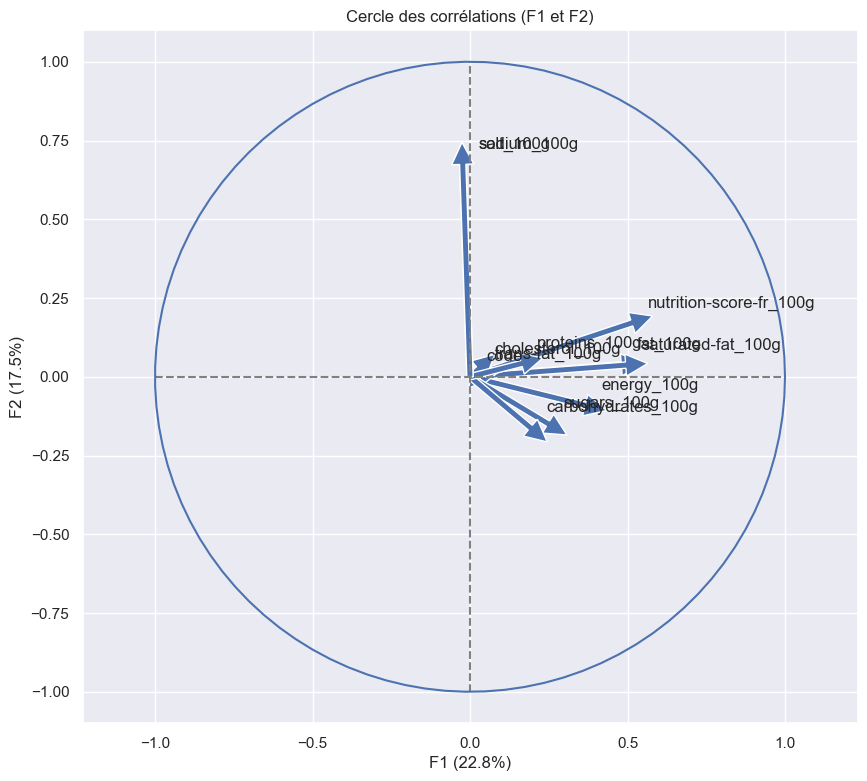

In [316]:
x, y = 0,1
correlation_graph(x_y=(x, y), pca=pca, features=data_pca.columns)

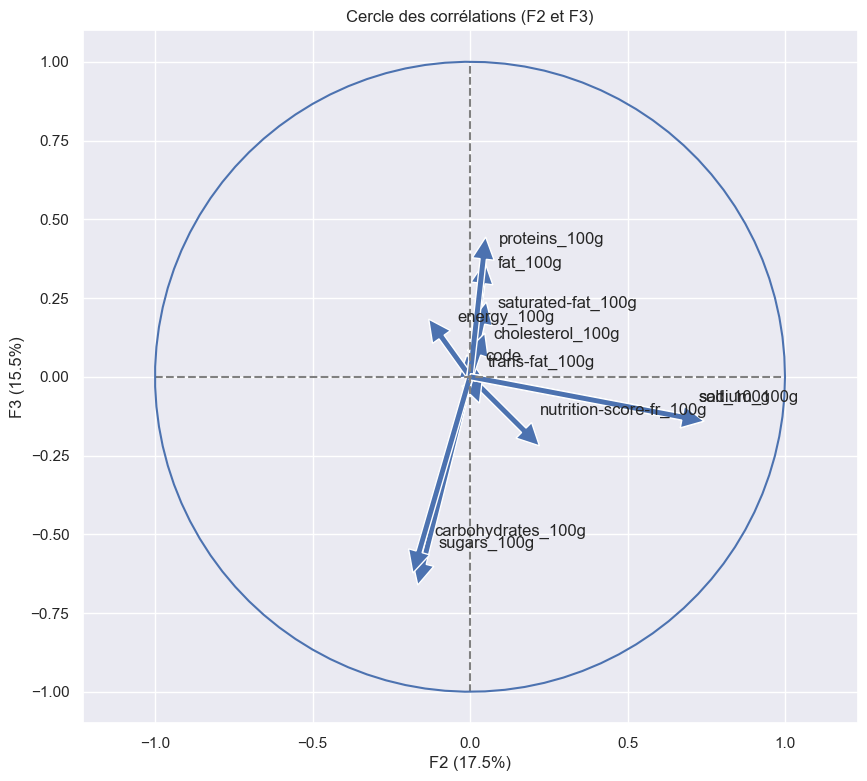

In [317]:
x, y = 1, 2
correlation_graph(x_y=(x, y), pca=pca, features=data_pca.columns)

## Projection

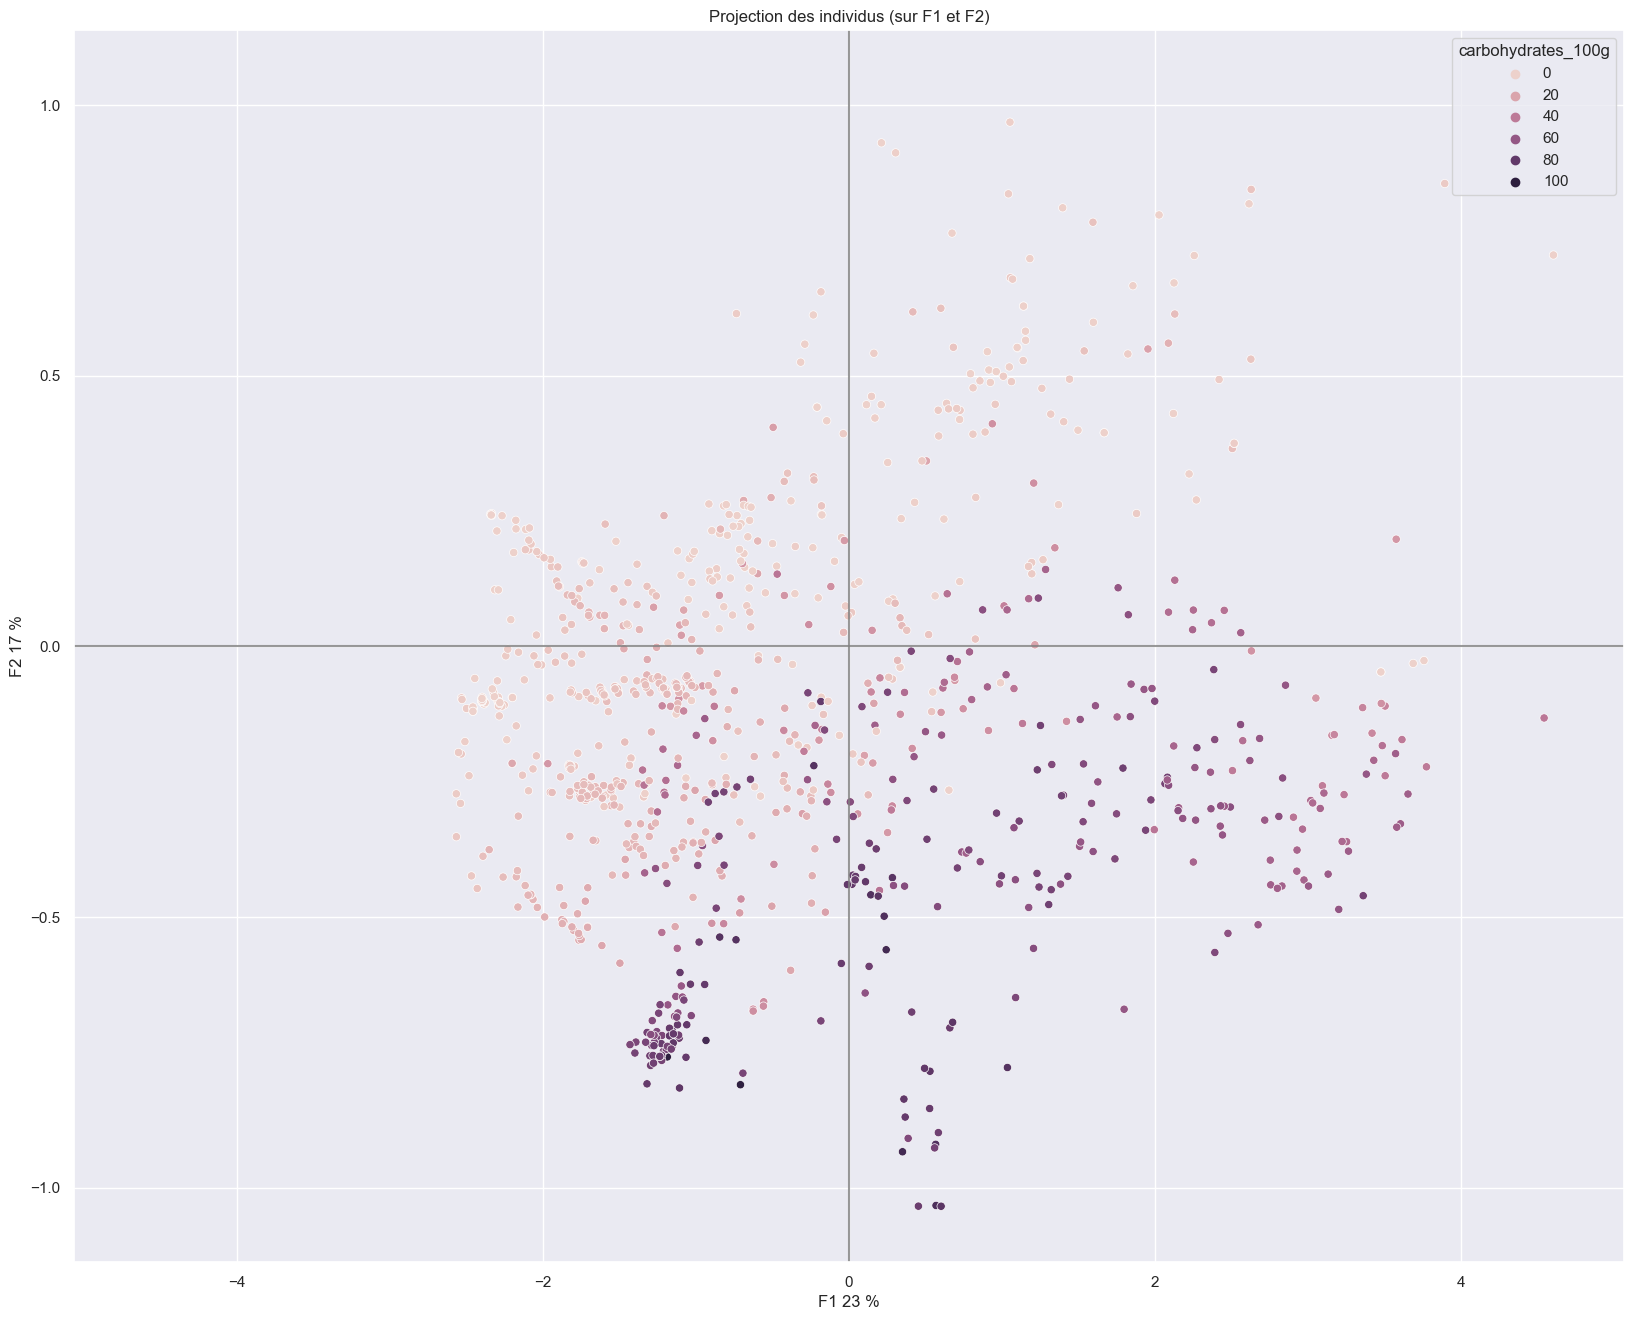

In [318]:
X_proj = pca.transform(X_scaled[:1000])
x_y = x, y
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=data_pca['carbohydrates_100g'].head(1000), marker="o")